In [1]:
import requests
from IPython.display import Image
import xmltodict
import ipywidgets as widgets
from ipywidgets import interact

In [2]:

url = 'http://apps.ecmwf.int/wms/' 

capa =  {
            "token": "public",
            "request": "GetCapabilities",
            "version": "1.1.1",
            
        }




capa = requests.get(url, capa, )

layers = xmltodict.parse(capa.text)
options = []
for layer in layers["WMT_MS_Capabilities"]["Capability"]["Layer"]["Layer"]:
    options.append(layer["Name"])
    


200


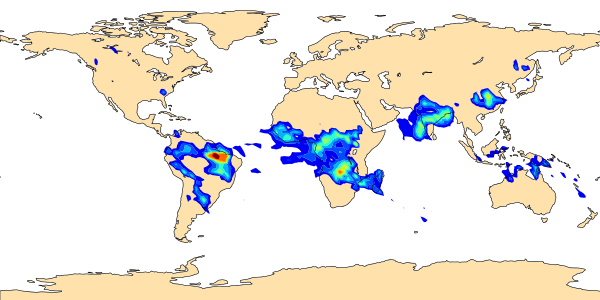

In [3]:
def getMap(param):
    params =  {
            "token": "public",
            "request": "GetMap",
            "version": "1.1.1",
            "srs": "EPSG:4326",
            "layers": "background,%s,foreground" % param,
            "width": 600,
            "height": 300,
            "format": "image/png",
        }

    r= requests.get(url,params, )
    print r.status_code

    with  open('workfile.png', 'w') as png:
        png.write(r.content)
    return Image(filename="workfile.png")

interact(getMap, param = widgets.Dropdown( options= options) )